In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import collections
import random
mpl.rcParams['font.sans-serif'] = [u'simHei']

In [59]:
data_path = r"D:\旧电脑\人工智能\05_随堂代码\sklearn11\datas\household_power_consumption_1000.txt"
data = pd.read_csv(data_path, ';', low_memory=False)
data.replace('?', np.nan, inplace=True)
# 删除为nan的数据
# axis：指定按照什么维度来删除数据，0表示第一维，也就是DataFrame中的行。1表示列
# how：指定进行什么样的删除操作，any表示只要出现任意一个特征属性为nan，那么就删除当前行或者当前列。all表示只有当所有的特征属性值均为nan的时候，才删除当前行或者当前列
data = data.dropna(axis=0, how='any')


In [60]:
X = data.iloc[:, 2:4]
Y = data.iloc[:, 5]


In [61]:
# split data to 3:1
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=10)
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 163 to 265
Data columns (total 2 columns):
Global_active_power      750 non-null float64
Global_reactive_power    750 non-null float64
dtypes: float64(2)
memory usage: 17.6 KB


In [64]:
# construct thea
x = np.mat(x_train)
y = np.mat(y_train).reshape(-1, 1)
thea = (x.T * x).I * x.T * y

In [68]:
# find Y
y_pred = np.mat(x_test) * thea 
# y_pred

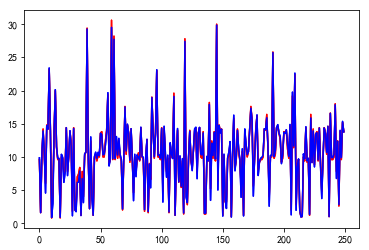

In [71]:
# plot
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r', label='真实值')
plt.plot(t, y_pred, 'b', label='预测值')
plt.show()

In [83]:
acc = y_test.reshape(-1, 1) - y_pred.reshape(-1, 1)
count = 1
for i in acc:
    if i[0] <= 0.01:
        count += 1


C:\Users\yanguowei\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [85]:
P = count / len(acc)
P

0.612

另外一种方式实现拟合操作

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.externals import joblib

In [88]:
scaler = StandardScaler()

In [89]:
x_train = scaler.fit_transform(x_train, y_train)

In [90]:
algo = LinearRegression(fit_intercept=True)

In [91]:
algo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print('thea:', algo.coef_)
print('截距项:', algo.intercept_)
print('效果:{}'.format(algo.score(x_train, y_train)))

thea: [ 5.02356645  0.06585415]
截距项: 10.2861333333
效果:0.9907862968089832


In [93]:
x_test = scaler.transform(x_test)
print('效果{}'.format(algo.score(x_test,y_test)))

效果0.9923092170838523


In [95]:
'''
将数据保存为磁盘文件
'''
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(algo, 'algo.pkl')

['algo.pkl']